In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df = pd.read_csv('2019.csv')

In [4]:
df.set_index('Overall rank', inplace=True)

In [5]:
# Top 10 happiest countries based on data set.
df.head(10)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308


In [6]:
df.columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [7]:
# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')

In [20]:
# Removed spacing on columns for faster analysis.
df.columns

Index(['Country_or_region', 'Score', 'GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [21]:
df.head(10)

,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
Overall rank,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308


In [8]:
# Looking for missing values and correct data type for analysis.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 1 to 156
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country_or_region             156 non-null    object 
 1   Score                         156 non-null    float64
 2   GDP_per_capita                156 non-null    float64
 3   Social_support                156 non-null    float64
 4   Healthy_life_expectancy       156 non-null    float64
 5   Freedom_to_make_life_choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions_of_corruption     156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 11.0+ KB


In [9]:
# Quick look at statistics
df.describe()

,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [10]:
# Creating a list of the top 10 countries for analysis. Then I'll do the bottom 10 to see if there is a correlation in ranking.
df_top_10 = df.head(10)

In [11]:
df_top_10

,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
Overall rank,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308


<AxesSubplot:xlabel='Overall rank'>

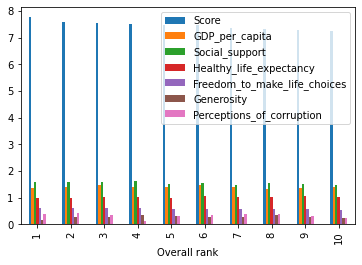

In [12]:
df_top_10.plot(kind='bar')

In [28]:
# I am going to do a correlation graph to see the triggers for the high ranking these countries have in common. I will be deleting the countries column to do so.
df_corr = df_top_10.drop('Country_or_region', axis=1)

In [29]:
df_corr

,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
Overall rank,,,,,,,
1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,7.480,1.452,1.526,1.052,0.572,0.263,0.343
7,7.343,1.387,1.487,1.009,0.574,0.267,0.373
8,7.307,1.303,1.557,1.026,0.585,0.330,0.380
9,7.278,1.365,1.505,1.039,0.584,0.285,0.308


In [31]:
df_corr.corr()

,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
Score,1.000000,0.194148,0.689305,-0.502092,0.571018,-0.487230,0.281962
GDP_per_capita,0.194148,1.000000,0.013140,0.361410,0.074698,0.000495,-0.064808
Social_support,0.689305,0.013140,1.000000,-0.140487,0.762610,0.096746,-0.124956
Healthy_life_expectancy,-0.502092,0.361410,-0.140487,1.000000,-0.005965,0.434520,-0.279876
Freedom_to_make_life_choices,0.571018,0.074698,0.762610,-0.005965,1.000000,-0.056271,0.311985
Generosity,-0.487230,0.000495,0.096746,0.434520,-0.056271,1.000000,-0.506651
Perceptions_of_corruption,0.281962,-0.064808,-0.124956,-0.279876,0.311985,-0.506651,1.000000


<AxesSubplot:>

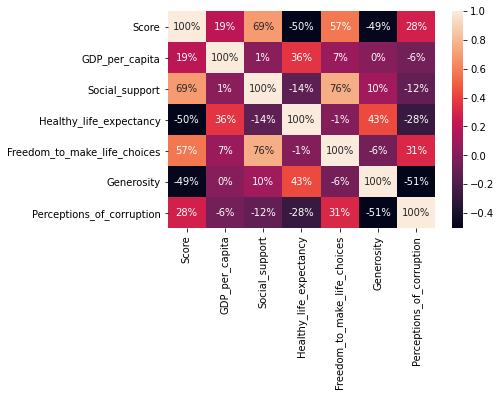

In [30]:
sns.heatmap(df_corr.corr(), annot=True, fmt='.0%')

In [34]:
df_bottom_10 = df.tail(10)

In [35]:
df_bottom_10

,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
Overall rank,,,,,,,,
147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


<AxesSubplot:xlabel='Overall rank'>

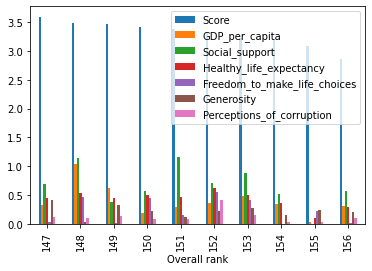

In [36]:
df_bottom_10.plot(kind='bar')

In [37]:
df_corr_2 = df_bottom_10.drop('Country_or_region', axis=1)

In [38]:
df_corr_2

,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
Overall rank,,,,,,,
147,3.597,0.323,0.688,0.449,0.026,0.419,0.110
148,3.488,1.041,1.145,0.538,0.455,0.025,0.100
149,3.462,0.619,0.378,0.440,0.013,0.331,0.141
150,3.410,0.191,0.560,0.495,0.443,0.218,0.089
151,3.380,0.287,1.163,0.463,0.143,0.108,0.077
152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
155,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [39]:
df_corr_2.corr()

,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
Score,1.000000,0.411473,0.384953,0.626671,0.191930,0.175229,0.179491
GDP_per_capita,0.411473,1.000000,0.565681,0.530665,0.207314,-0.363444,0.124056
Social_support,0.384953,0.565681,1.000000,0.714243,0.309085,-0.470983,0.171790
Healthy_life_expectancy,0.626671,0.530665,0.714243,1.000000,0.526710,-0.104546,0.628965
Freedom_to_make_life_choices,0.191930,0.207314,0.309085,0.526710,1.000000,-0.327657,0.551589
Generosity,0.175229,-0.363444,-0.470983,-0.104546,-0.327657,1.000000,0.138072
Perceptions_of_corruption,0.179491,0.124056,0.171790,0.628965,0.551589,0.138072,1.000000


<AxesSubplot:>

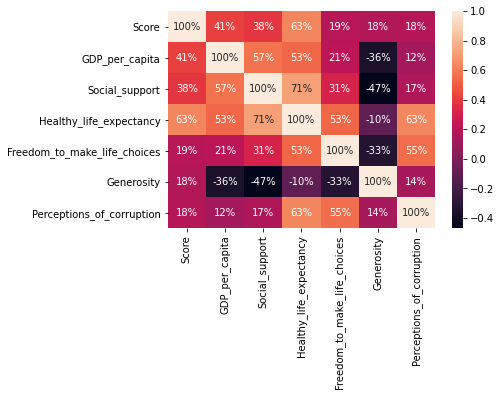

In [40]:
# Top 3 correlations: social support/healthy life expectancy, corruption/health. Health and perception of corruption affect rank.
sns.heatmap(df_corr_2.corr(), annot=True, fmt='.0%')

----- USA VS MEXICO COMPARISON -----

In [49]:
# Filtering data / rows to show only USA and Mexico
filtered_df = df[df['Country_or_region'].isin(['United States', 'Mexico'])]

In [50]:
filtered_df

,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
Overall rank,,,,,,,,
19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128
23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073


<AxesSubplot:xlabel='Overall rank'>

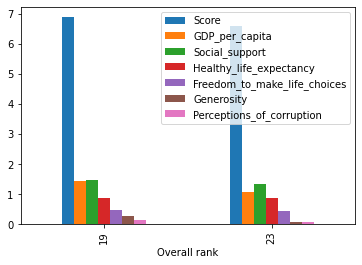

In [57]:
filtered_df.plot(kind='bar')